# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and setup
from citipy import citipy
import random
import pandas as pd
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
from scipy.stats import linregress
from datetime import datetime

#Importing sys to be able to see the key from different directories
import sys

sys.path.append("../")

# Import API key
from api_keys import weather_api_key

## Generate Cities List

In [3]:
# Use random module to generate a random list of longitude and latitude values and pair them
longitudes = np.random.uniform(-180, 180, 1800)
latitudes = np.random.uniform(-90, 90, 1800)
cities_df = pd.DataFrame({"Lat":latitudes, "Lng":longitudes})

# Create empty list to store names of city
city_names = []

# Use for loop to find each city located at the paired values
for i in range(0, len(cities_df)):
    lat = cities_df.iloc[i]["Lat"]
    long = cities_df.iloc[i]["Lng"]
    city = citipy.nearest_city(lat, long)
    name = city.city_name
    city_names.append(name)

# Add City column to dataframe
cities_df["City"] = city_names

# Preview dataframe
cities_df

,Lat,Lng,City
0,-44.179138,82.513939,mahebourg
1,-23.929630,94.861338,carnarvon
2,-85.063389,-103.115094,punta arenas
3,22.076830,56.135380,nizwa
4,-1.795132,167.930612,tabiauea
...,...,...,...
1795,74.466097,31.900769,vardo
1796,-61.933323,-125.416480,rikitea
1797,-79.399640,-53.248880,ushuaia
1798,-51.249933,-47.235230,mar del plata


In [4]:
# Check the number of unique cities and compare to number of rows in dataframe
cities_df["City"].nunique()

711

In [5]:
# Since the number of rows are more than unique cities, we need to drop the duplicates
unique_cities_df = cities_df.drop_duplicates("City", keep="first").reset_index(drop=True)

In [6]:
city_count = unique_cities_df["City"].nunique()
city_count

711

In [7]:
# Check to see if rows were dropped
unique_cities_df

,Lat,Lng,City
0,-44.179138,82.513939,mahebourg
1,-23.929630,94.861338,carnarvon
2,-85.063389,-103.115094,punta arenas
3,22.076830,56.135380,nizwa
4,-1.795132,167.930612,tabiauea
...,...,...,...
706,-12.155872,46.358761,dzaoudzi
707,-25.038610,-44.447066,ilhabela
708,48.752202,-121.805235,chilliwack
709,0.523678,21.113208,boende


In [8]:
# Add empty columns to dataframe to store data
unique_cities_df["Max Temp"] = ""
unique_cities_df["Humidity"] = ""
unique_cities_df["Cloudiness"] = ""
unique_cities_df["Wind Speed"] = ""
unique_cities_df["Country"] = ""
unique_cities_df["Date"] = ""
unique_cities_df = unique_cities_df[["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]]

# Preview dataframe
unique_cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mahebourg,-44.179138,82.513939,,,,,,
1,carnarvon,-23.929630,94.861338,,,,,,
2,punta arenas,-85.063389,-103.115094,,,,,,
3,nizwa,22.076830,56.135380,,,,,,
4,tabiauea,-1.795132,167.930612,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
# Make a request for each of the indices and include print log
weather_url = "http://api.openweathermap.org/data/2.5/weather?"

print("""Beginning Data Retrieval
-----------------------------""")

for x in range(len(unique_cities_df)):
    city = unique_cities_df.iloc[x]['City']
    
    print(f"Processing Record {x+1} of {city_count} | {city}")

    weather_response = requests.get(f"{weather_url}q={city}&units=imperial&appid={weather_api_key}")
    weather_response_json = weather_response.json()
    
    try: 
        unique_cities_df.at[x, "Max Temp"] = weather_response_json["main"]["temp"]
        unique_cities_df.at[x, "Humidity"] = weather_response_json["main"]["humidity"]
        unique_cities_df.at[x, "Cloudiness"] = weather_response_json["clouds"]["all"]
        unique_cities_df.at[x, "Wind Speed"] = weather_response_json["wind"]["speed"]
        unique_cities_df.at[x, "Country"] = weather_response_json["sys"]["country"]
        unique_cities_df.at[x, "Date"] = weather_response_json["dt"]
    except:
        print("Missing city weather data. Skipping to next city.")
        
print("""-----------------------------
Data Retrieval Complete      
-----------------------------
""")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 711 | mahebourg
Processing Record 2 of 711 | carnarvon
Processing Record 3 of 711 | punta arenas
Processing Record 4 of 711 | nizwa
Processing Record 5 of 711 | tabiauea
Missing city weather data. Skipping to next city.
Processing Record 6 of 711 | viedma
Processing Record 7 of 711 | tungkang
Missing city weather data. Skipping to next city.
Processing Record 8 of 711 | tabou
Processing Record 9 of 711 | moose factory
Processing Record 10 of 711 | chokurdakh
Processing Record 11 of 711 | ushuaia
Processing Record 12 of 711 | manteca
Processing Record 13 of 711 | upernavik
Processing Record 14 of 711 | floro
Processing Record 15 of 711 | agadez
Processing Record 16 of 711 | pevek
Processing Record 17 of 711 | ayan
Processing Record 18 of 711 | jamestown
Processing Record 19 of 711 | busselton
Processing Record 20 of 711 | dukat
Processing Record 21 of 711 | vaini
Processing Record 22 of 711 | sorong
Processing

Processing Record 188 of 711 | saint-philippe
Processing Record 189 of 711 | vaitupu
Missing city weather data. Skipping to next city.
Processing Record 190 of 711 | vikindu
Processing Record 191 of 711 | katsiveli
Missing city weather data. Skipping to next city.
Processing Record 192 of 711 | kruisfontein
Processing Record 193 of 711 | san cristobal
Processing Record 194 of 711 | denpasar
Processing Record 195 of 711 | faanui
Processing Record 196 of 711 | belushya guba
Missing city weather data. Skipping to next city.
Processing Record 197 of 711 | campbell river
Processing Record 198 of 711 | okha
Processing Record 199 of 711 | bulancak
Processing Record 200 of 711 | kalianget
Processing Record 201 of 711 | acari
Processing Record 202 of 711 | kaitangata
Processing Record 203 of 711 | byron bay
Processing Record 204 of 711 | vila franca do campo
Processing Record 205 of 711 | luderitz
Processing Record 206 of 711 | saleaula
Missing city weather data. Skipping to next city.
Processi

Processing Record 374 of 711 | kadykchan
Missing city weather data. Skipping to next city.
Processing Record 375 of 711 | port macquarie
Processing Record 376 of 711 | qingyuan
Processing Record 377 of 711 | oriximina
Processing Record 378 of 711 | egvekinot
Processing Record 379 of 711 | serenje
Processing Record 380 of 711 | pincher creek
Processing Record 381 of 711 | west bay
Processing Record 382 of 711 | taonan
Processing Record 383 of 711 | rosario
Processing Record 384 of 711 | arauco
Processing Record 385 of 711 | mount isa
Processing Record 386 of 711 | sentyabrskiy
Missing city weather data. Skipping to next city.
Processing Record 387 of 711 | iskateley
Processing Record 388 of 711 | the valley
Processing Record 389 of 711 | komsomolskoye
Processing Record 390 of 711 | maholi
Processing Record 391 of 711 | sorvag
Missing city weather data. Skipping to next city.
Processing Record 392 of 711 | san pedro
Processing Record 393 of 711 | dunedin
Processing Record 394 of 711 | ma

Processing Record 562 of 711 | bemidji
Processing Record 563 of 711 | pueblo viejo
Processing Record 564 of 711 | ponta delgada
Processing Record 565 of 711 | kasongo
Processing Record 566 of 711 | tumannyy
Missing city weather data. Skipping to next city.
Processing Record 567 of 711 | karratha
Processing Record 568 of 711 | bukachacha
Processing Record 569 of 711 | gat
Processing Record 570 of 711 | pangnirtung
Processing Record 571 of 711 | stabat
Processing Record 572 of 711 | attawapiskat
Missing city weather data. Skipping to next city.
Processing Record 573 of 711 | jibuti
Processing Record 574 of 711 | ust-kuyga
Processing Record 575 of 711 | kununurra
Processing Record 576 of 711 | obo
Processing Record 577 of 711 | padang
Processing Record 578 of 711 | pisco
Processing Record 579 of 711 | vung tau
Processing Record 580 of 711 | kyra
Processing Record 581 of 711 | sobreira
Processing Record 582 of 711 | banda aceh
Processing Record 583 of 711 | magdagachi
Processing Record 584

In [11]:
# Drop rows that have no weather data by checking for empty cells
unique_cities_df = unique_cities_df[unique_cities_df["Max Temp"].astype(bool)]

In [12]:
# Check number of rows left
unique_cities_df["Max Temp"].count()

657

In [13]:
# Preview dataframe
unique_cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mahebourg,-44.179138,82.513939,78.8,61,40,11.41,MU,1602999113
1,carnarvon,-23.929630,94.861338,77,65,90,20.8,AU,1602999113
2,punta arenas,-85.063389,-103.115094,41,86,72,8.05,CL,1602999113
3,nizwa,22.076830,56.135380,88.34,9,16,1.03,OM,1602999114
5,viedma,-43.823507,-61.262479,75.6,30,0,14.52,AR,1602998818
...,...,...,...,...,...,...,...,...,...
706,dzaoudzi,-12.155872,46.358761,75.2,88,75,11.41,YT,1602999262
707,ilhabela,-25.038610,-44.447066,67.75,79,97,7.99,BR,1602999262
708,chilliwack,48.752202,-121.805235,50.29,89,100,2.21,CA,1602999004
709,boende,0.523678,21.113208,76.15,84,94,1.16,CD,1602999262


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
# Export dataframe to .csv file
unique_cities_df.to_csv('cities.csv')

In [15]:
# Preview dataframe
unique_cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mahebourg,-44.179138,82.513939,78.8,61,40,11.41,MU,1602999113
1,carnarvon,-23.929630,94.861338,77,65,90,20.8,AU,1602999113
2,punta arenas,-85.063389,-103.115094,41,86,72,8.05,CL,1602999113
3,nizwa,22.076830,56.135380,88.34,9,16,1.03,OM,1602999114
5,viedma,-43.823507,-61.262479,75.6,30,0,14.52,AR,1602998818
...,...,...,...,...,...,...,...,...,...
706,dzaoudzi,-12.155872,46.358761,75.2,88,75,11.41,YT,1602999262
707,ilhabela,-25.038610,-44.447066,67.75,79,97,7.99,BR,1602999262
708,chilliwack,48.752202,-121.805235,50.29,89,100,2.21,CA,1602999004
709,boende,0.523678,21.113208,76.15,84,94,1.16,CD,1602999262


In [16]:
# Convert all numerical columns to float
unique_cities_df["Max Temp"] = pd.to_numeric(unique_cities_df["Max Temp"])
unique_cities_df["Humidity"] = pd.to_numeric(unique_cities_df["Humidity"])
unique_cities_df["Cloudiness"] = pd.to_numeric(unique_cities_df["Cloudiness"])
unique_cities_df["Wind Speed"] = pd.to_numeric(unique_cities_df["Wind Speed"])
unique_cities_df["Date"] = pd.to_numeric(unique_cities_df["Date"])

# Calculate summary stats and display in table
summary_stats_df = unique_cities_df.describe()
summary_stats_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,6.570000e+02
mean,15.750755,20.360921,62.117184,70.471842,50.532725,7.727549,1.602999e+09
std,36.272541,93.179022,19.733619,22.315426,37.888547,5.395839,7.208911e+01
min,-88.647295,-178.360401,1.400000,1.000000,0.000000,0.110000,1.602999e+09
25%,-11.906103,-61.489312,46.980000,58.000000,10.000000,3.830000,1.602999e+09
50%,17.462555,26.807400,65.890000,77.000000,52.000000,6.150000,1.602999e+09
75%,45.110496,102.262891,78.390000,88.000000,90.000000,10.290000,1.602999e+09
max,88.666378,179.556922,102.200000,100.000000,100.000000,29.970000,1.602999e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#  Get the indices of cities that have humidity over 100%.
humidity_indices = unique_cities_df.index[unique_cities_df["Humidity"] > 100].tolist()
humidity_indices

[]

In [18]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = unique_cities_df.drop(humidity_indices, inplace = False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mahebourg,-44.179138,82.513939,78.80,61,40,11.41,MU,1602999113
1,carnarvon,-23.929630,94.861338,77.00,65,90,20.80,AU,1602999113
2,punta arenas,-85.063389,-103.115094,41.00,86,72,8.05,CL,1602999113
3,nizwa,22.076830,56.135380,88.34,9,16,1.03,OM,1602999114
5,viedma,-43.823507,-61.262479,75.60,30,0,14.52,AR,1602998818
...,...,...,...,...,...,...,...,...,...
706,dzaoudzi,-12.155872,46.358761,75.20,88,75,11.41,YT,1602999262
707,ilhabela,-25.038610,-44.447066,67.75,79,97,7.99,BR,1602999262
708,chilliwack,48.752202,-121.805235,50.29,89,100,2.21,CA,1602999004
709,boende,0.523678,21.113208,76.15,84,94,1.16,CD,1602999262


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [19]:
# Create dynamic date variable to insert into plot title
date = "{:%m/%d/%y}".format(datetime.now())
date

'10/17/20'

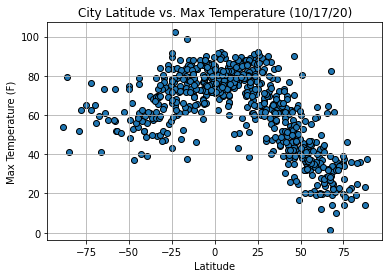

This plot shows the relationship between city latitude and max temperature.
Max Temperature increases as latitude gets closer to 0.
Max Temperature decreases as latitude goes farther from 0.
Therefore temperature increases as you get closer to equator.


In [20]:
# Plot latitude vs temperature
x_values = clean_city_data['Lat']
y_values = clean_city_data['Max Temp']
plt.scatter(x_values,y_values, edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save plot as png file
plt.savefig("Latitude vs Temperature.png")

# Preview
plt.show()

# Print explanation of results
print("""This plot shows the relationship between city latitude and max temperature.
Max Temperature increases as latitude gets closer to 0.
Max Temperature decreases as latitude goes farther from 0.
Therefore temperature increases as you get closer to equator.""")

## Latitude vs. Humidity Plot

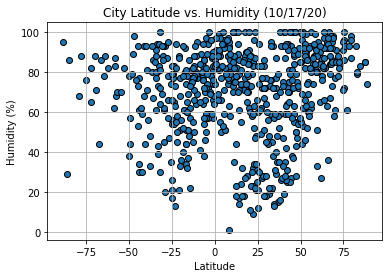

This plot shows relationship between city latitude and humidity.
Most cities are located between latitude of -25 and 75 and have high humidity.


In [22]:
# Plot latitude vs humidity
x_values = clean_city_data['Lat']
y_values = clean_city_data['Humidity']
plt.scatter(x_values,y_values, edgecolors="black")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save plot as png file
plt.savefig("Latitude vs Humidity.png")

# Preview
plt.show()

# Print explanation of results
print("""This plot shows relationship between city latitude and humidity.
Most cities are located between latitude of -25 and 75 and have high humidity.""")

## Latitude vs. Cloudiness Plot

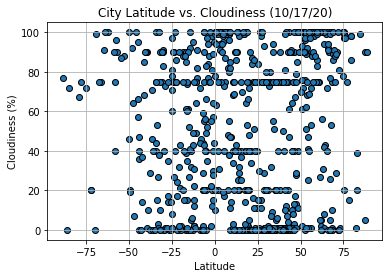

This plot shows relationship between city latitude and cloudiness.
Cloudiness is evenly distributed between latitudes of -50 and 75.
Cloudiness isn't affected as you get closer to the equator.


In [23]:
# Plot latitude vs cloudiness
x_values = clean_city_data['Lat']
y_values = clean_city_data['Cloudiness']
plt.scatter(x_values,y_values, edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save plot as png file
plt.savefig("Latitude vs Cloudiness.png")

# Preview
plt.show()

# Print explanation of results
print("""This plot shows relationship between city latitude and cloudiness.
Cloudiness is evenly distributed between latitudes of -50 and 75.
Cloudiness isn't affected as you get closer to the equator.""")

## Latitude vs. Wind Speed Plot

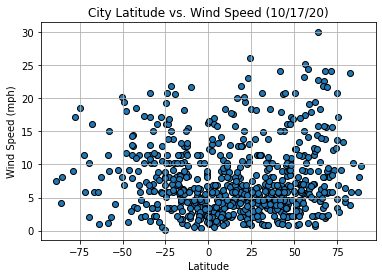

This plot shows relationship between city latitude and wind speed.
Wind speed is mostly under 20 mph for majority of cities between latitude -50 and 75.
Wind speed doesn't get affected as you get closer to the equator.


In [24]:
# Plot latitude vs temperature
x_values = clean_city_data['Lat']
y_values = clean_city_data['Wind Speed']
plt.scatter(x_values,y_values, edgecolors="black")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save plot as png file
plt.savefig("Latitude vs Wind Speed.png")

# Preview
plt.show()

# Print explanation of results
print("""This plot shows relationship between city latitude and wind speed.
Wind speed is mostly under 20 mph for majority of cities between latitude -50 and 75.
Wind speed doesn't get affected as you get closer to the equator.""")

## Linear Regression

In [25]:
# Create a copy of dataframe and drop cities that are in southern hemisphere
northern_lat_df = unique_cities_df.copy()
northern_lat_df.drop(northern_lat_df[northern_lat_df["Lat"] < 0].index, inplace = True)

# Create a copy of dataframe and drop cities that are in northern hemisphere
southern_lat_df = unique_cities_df.copy()
southern_lat_df.drop(southern_lat_df[southern_lat_df["Lat"] > 0].index, inplace = True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.6910067596948668


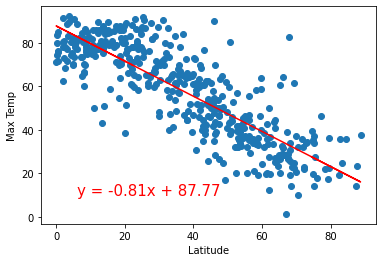

In [26]:
# Define x and y values
x_values = northern_lat_df['Lat']
y_values = northern_lat_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save plot as png file
plt.savefig("Northern Latitude vs Temperature.png")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.28672966796695765


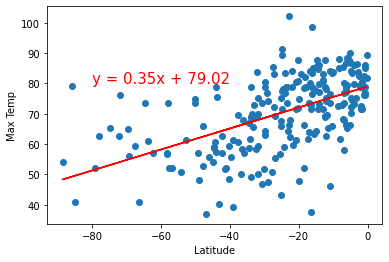

In [27]:
# Define x and y values
x_values = southern_lat_df['Lat']
y_values = southern_lat_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-80,80),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save plot as png file
plt.savefig("Southern Latitude vs Temperature.png")

# Show plot
plt.show()

In [28]:
# Print explanation of latitude vs temperature for northern and southern hemishperes
print("""These plots show the relationship between city latitude and temperature.
Temperature increases as you get closer to the equator and as you get farther from it the temperature decreases.
From the linear regression model the temperature range of the equator is between 78 and 86 degrees fahrenheit.""")

These plots show the relationship between city latitude and temperature.
Temperature increases as you get closer to the equator and as you get farther from it the temperature decreases.
From the linear regression model the temperature range of the equator is between 78 and 86 degrees fahrenheit.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.03086956448427102


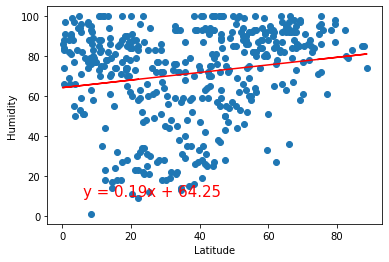

In [29]:
# Define x and y values
x_values = northern_lat_df['Lat']
y_values = northern_lat_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save plot as png file
plt.savefig("Northern Latitude vs Humidity.png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 1.9892089270598684e-05


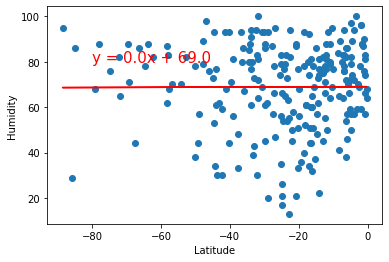

In [30]:
# Define x and y values
x_values = southern_lat_df['Lat']
y_values = southern_lat_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-80,80),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save plot as png file
plt.savefig("Southern Latitude vs Humidity.png")

# Show plot
plt.show()

In [31]:
# Print explanation of latitude vs humidity for northern and southern hemishperes
print("""This plot shows relationship between city latitude and humidity.
Humidity slightly increases as latitude increases.
Humidity around the equator ranges from 64 to 73 percent based on the model.""")

This plot shows relationship between city latitude and humidity.
Humidity slightly increases as latitude increases.
Humidity around the equator ranges from 64 to 73 percent based on the model.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.00793403609703167


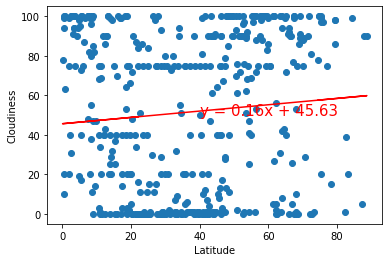

In [32]:
# Define x and y values
x_values = northern_lat_df['Lat']
y_values = northern_lat_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,50),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save plot as png file
plt.savefig("Northern Latitude vs Cloudiness.png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.010098769909175272


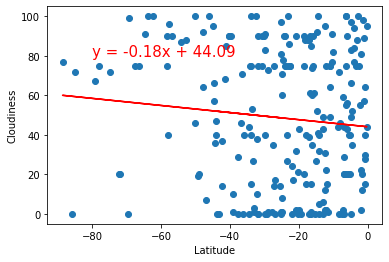

In [33]:
# Define x and y values
x_values = southern_lat_df['Lat']
y_values = southern_lat_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-80,80),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save plot as png file
plt.savefig("Southern Latitude vs Cloudiness.png")

# Show plot
plt.show()

In [34]:
# Print explanation of latitude vs cloudiness for northern and southern hemishperes
print("""This plot shows relationship between city latitude and cloudiness.
Cloudiness slightly increases as latitude increases.
Cloudiness around equator ranges between 36 and 57 percent.""")

This plot shows relationship between city latitude and cloudiness.
Cloudiness slightly increases as latitude increases.
Cloudiness around equator ranges between 36 and 57 percent.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.03504137823309531


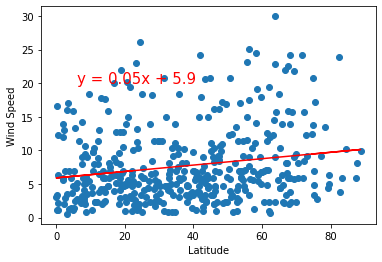

In [35]:
# Define x and y values
x_values = northern_lat_df['Lat']
y_values = northern_lat_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save plot as png file
plt.savefig("Northern Latitude vs Wind Speed.png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.05351161720114066


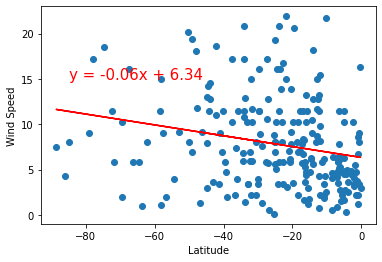

In [36]:
# Define x and y values
x_values = southern_lat_df['Lat']
y_values = southern_lat_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-85,15),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save plot as png file
plt.savefig("Southern Latitude vs Wind Speed.png")

# Show plot
plt.show()

In [37]:
# Print explanation of latitude vs wind speed for northern and southern hemishperes
print("""This plot shows relationship between city latitude and wind speed.
Wind speed decreases as you get closer to the equator.
Wind speed is around 6 mph near the equator based on model.""")

This plot shows relationship between city latitude and wind speed.
Wind speed decreases as you get closer to the equator.
Wind speed is around 6 mph near the equator based on model.
